## Importing the Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from datetime import datetime, timedelta

## Joining the Datasets

In [5]:
import os
import pandas as pd
import numpy as np

'''
fileNames is a list with the names of the csv files within the specified 
folder path (i.e. data_preprocessing, data_preprocessing_with_PCA, data_preprocessing_with_FastICA etc.. )
'''

fileNames = []
for file in os.listdir("data_preprocessing_with_PCA"):
    if file.endswith(".csv"):
        fileNames.append(file)


print(fileNames)
print( 'Total number of csv files to be combined is : {}'.format(len(fileNames)))

'''
function that reads the file from the fileNames list and converts it to a dataFrame
'''
def getFile(fn):
    location = 'data_preprocessing_with_PCA/' + fn
    df = pd.read_csv(location)
    return df


'''
List comprehension to create the final dataframe

'''
dfs = [getFile(file) for file in fileNames]
df_final = pd.concat(dfs,ignore_index=True)

['Mohamed_Fatigue_1.csv', 'Mohamed_Fatigue_2.csv', 'Toma_Normal_1.csv', 'Toma_Normal_2.csv', 'Mohamed_Normal_2.csv', 'Mohamed_Normal_1.csv', 'Toma_Fatigue_1.csv', 'Toma_Fatigue_2.csv']
Total number of csv files to be combined is : 8


In [6]:
df_final

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,pca_1,pca_2,pca_3,pca_4,pca_5,State
0,2021-11-04 22:33:00.279,0.612606,0.471052,0.902681,0.573213,-0.197819,0.163572,0.930586,1.266999,0.364898,...,0.037535,0.235473,-0.286553,0.376319,0.767457,-0.189577,-0.461100,-0.000496,0.748765,0
1,2021-11-04 22:33:01.286,0.612606,0.471052,1.195261,0.573213,-0.197819,0.163572,0.425715,1.266999,0.364898,...,0.037535,0.235473,-0.411110,0.376319,0.704118,-0.115049,-0.439489,-0.045767,0.848684,0
2,2021-11-04 22:33:02.293,1.209300,0.415454,0.235469,0.573213,0.803135,0.281510,-0.079156,1.266999,0.997948,...,0.558992,-0.023969,-0.215431,0.376319,0.787070,0.872002,-0.537851,0.372993,0.159470,0
3,2021-11-04 22:33:03.305,1.410830,0.354835,0.135517,0.573213,0.959180,0.219960,-0.069674,1.266999,1.001552,...,0.560869,-0.021058,-0.102743,0.376319,0.869330,0.890565,-0.588659,0.525724,0.138544,0
4,2021-11-04 22:33:04.328,0.825907,0.283376,0.389344,0.573213,1.016448,0.093457,0.033953,1.266999,1.001552,...,0.531963,0.176188,-0.025905,0.376319,0.915979,0.707269,-0.606582,0.553283,0.048484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2021-11-01 13:35:22.312,0.933747,0.530463,0.335329,1.437184,0.689638,0.201649,0.229954,1.394031,0.798499,...,-0.058458,-0.414926,-0.053582,0.185391,-0.333243,-0.413216,-0.190272,-0.262597,-0.037214,0
2435,2021-11-01 13:35:23.312,0.485772,0.267747,0.031685,1.460439,0.427949,0.000166,-0.177725,1.190069,0.681464,...,-0.001994,-0.327831,-0.049221,0.051768,-0.005584,-0.515529,0.040855,-0.280815,-0.292066,0
2436,2021-11-01 13:35:24.312,1.008424,0.431196,-0.073675,1.452151,0.864985,0.179795,-0.123712,1.000559,1.193775,...,0.265009,-0.462567,0.065118,0.114395,-0.493635,-0.349529,0.079811,0.098907,-0.135862,0
2437,2021-11-01 13:35:25.313,1.370428,0.452172,0.066568,1.476014,1.160193,0.209487,-0.121387,1.158138,1.279754,...,0.301089,-0.499454,0.192926,0.136858,-0.692635,-0.325841,0.038347,0.301268,0.034100,0


In [7]:
#df_final['State'].unique()
df_final.drop(['TimeStamp'], axis = 1, inplace = True)

In [11]:
df_final

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,pca_1,pca_2,pca_3,pca_4,pca_5,State
0,0.612606,0.471052,0.902681,0.573213,-0.197819,0.163572,0.930586,1.266999,0.364898,0.379254,...,0.037535,0.235473,-0.286553,0.376319,0.767457,-0.189577,-0.461100,-0.000496,0.748765,0
1,0.612606,0.471052,1.195261,0.573213,-0.197819,0.163572,0.425715,1.266999,0.364898,0.379254,...,0.037535,0.235473,-0.411110,0.376319,0.704118,-0.115049,-0.439489,-0.045767,0.848684,0
2,1.209300,0.415454,0.235469,0.573213,0.803135,0.281510,-0.079156,1.266999,0.997948,0.379254,...,0.558992,-0.023969,-0.215431,0.376319,0.787070,0.872002,-0.537851,0.372993,0.159470,0
3,1.410830,0.354835,0.135517,0.573213,0.959180,0.219960,-0.069674,1.266999,1.001552,0.422289,...,0.560869,-0.021058,-0.102743,0.376319,0.869330,0.890565,-0.588659,0.525724,0.138544,0
4,0.825907,0.283376,0.389344,0.573213,1.016448,0.093457,0.033953,1.266999,1.001552,0.366807,...,0.531963,0.176188,-0.025905,0.376319,0.915979,0.707269,-0.606582,0.553283,0.048484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,0.933747,0.530463,0.335329,1.437184,0.689638,0.201649,0.229954,1.394031,0.798499,0.093874,...,-0.058458,-0.414926,-0.053582,0.185391,-0.333243,-0.413216,-0.190272,-0.262597,-0.037214,0
2435,0.485772,0.267747,0.031685,1.460439,0.427949,0.000166,-0.177725,1.190069,0.681464,0.328012,...,-0.001994,-0.327831,-0.049221,0.051768,-0.005584,-0.515529,0.040855,-0.280815,-0.292066,0
2436,1.008424,0.431196,-0.073675,1.452151,0.864985,0.179795,-0.123712,1.000559,1.193775,0.335833,...,0.265009,-0.462567,0.065118,0.114395,-0.493635,-0.349529,0.079811,0.098907,-0.135862,0
2437,1.370428,0.452172,0.066568,1.476014,1.160193,0.209487,-0.121387,1.158138,1.279754,0.249085,...,0.301089,-0.499454,0.192926,0.136858,-0.692635,-0.325841,0.038347,0.301268,0.034100,0


In [8]:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19)

## Auto ML

In [12]:
from supervised.automl import AutoML

automl = AutoML(eval_metric="accuracy")
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)

AutoML directory: AutoML_2
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.504367 trained in 0.92 seconds
2_DecisionTree accuracy 0.877729 trained in 4.21 seconds
3_Linear accuracy 0.840611 trained in 2.89 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.958515 trained in 4.26 seconds
5_Default_NeuralNetwork accuracy 0.9869 trained in 1.14 seconds
6_Default_RandomForest accuracy 0.90393 trained in 3.11 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.989083 trained in 0.52 seconds
AutoML fit time: 28.37 seconds
AutoML best model: Ensemble


## ANN Classifier

Using the recommendation from the AutoML library, we decided to start with ANN

In [17]:
Model=tf.keras.models.Sequential()

In [18]:
Model.add(tf.keras.layers.Dense(25,activation='relu'))

In [19]:
Model.add(tf.keras.layers.Dense(16,activation='relu'))

In [20]:
Model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [21]:
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
Model.fit(X_train, y_train, batch_size = 32, epochs = 100)

2021-11-23 06:03:49.403356: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
58/58 [==============================] - 1s 1ms/step - loss: 0.6315 - accuracy: 0.6916
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7988
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8502
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8759
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.9016
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 0.2351 - accuracy: 0.9174
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9229
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9338
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9420
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9492
Epoch 11/

58/58 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 84/100
58/58 [==============================] - 0s 2ms/step - loss: 9.6597e-04 - accuracy: 1.0000
Epoch 85/100
58/58 [==============================] - 0s 2ms/step - loss: 9.6482e-04 - accuracy: 1.0000
Epoch 86/100
58/58 [==============================] - 0s 1ms/step - loss: 9.1124e-04 - accuracy: 1.0000
Epoch 87/100
58/58 [==============================] - 0s 1ms/step - loss: 8.5616e-04 - accuracy: 1.0000
Epoch 88/100
58/58 [==============================] - 0s 2ms/step - loss: 7.9446e-04 - accuracy: 1.0000
Epoch 89/100
58/58 [==============================] - 0s 2ms/step - loss: 7.8445e-04 - accuracy: 1.0000
Epoch 90/100
58/58 [==============================] - 0s 2ms/step - loss: 8.0204e-04 - accuracy: 1.0000
Epoch 91/100
58/58 [==============================] - 0s 1ms/step - loss: 7.7891e-04 - accuracy: 1.0000
Epoch 92/100
58/58 [==============================] - 0s 2ms/step - loss: 6.6921e

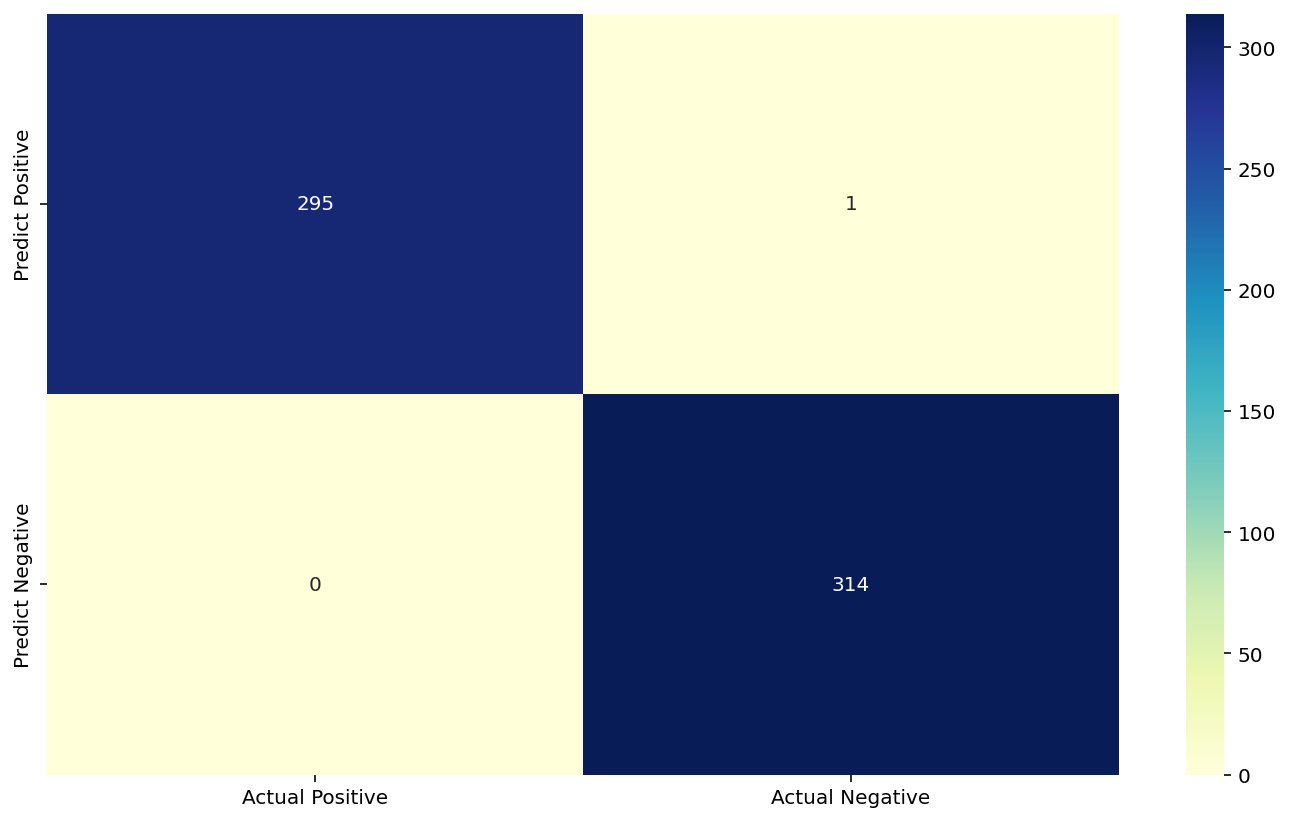

Model Accuracy is: 99.84 %
20/20 [==============================] - 0s 934us/step - loss: 0.0062 - accuracy: 0.9984


[0.006191330496221781, 0.9983606338500977]

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_ANN=Model.predict(X_test)
y_pred_ANN = (y_pred_ANN > 0.5) 
cm = confusion_matrix(y_test, y_pred_ANN)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print("Model Accuracy is:",round((accuracy_score(y_test, y_pred_ANN)*100),2),"%")
Model.evaluate(X_test,y_test)